# Session 3 — Practical (4 hours)

**Objective**  
Fit, evaluate, and interpret simple and multiple linear regression models using Excel, R, and Python.

## Learning outcomes
- Fit simple and multiple linear regression models.
- Evaluate model performance (R², RMSE, residual analysis).
- Interpret coefficients, p-values, and confidence intervals.
- Export and report model results across Excel, R, and Python.

## Materials & tools
- Dataset (CSV) for regression practice  
- Excel (with Analysis ToolPak or Data Analysis add-in)  
- R (RStudio recommended)  
- Python (Jupyter Notebook; pandas, statsmodels, scikit-learn, matplotlib/seaborn)

## Agenda (4 hours)
1. Introduction & objectives — 10 min  
2. Excel: build and interpret regression — 40 min  
3. R: fit models with lm(), diagnostics — 50 min  
4. Break — 10 min  
5. Python: fit models with statsmodels and scikit-learn — 60 min  
6. Model comparison & interpretation — 30 min  
7. Hands-on exercise & discussion — 30 min

## Practical exercises
- Excel: Load CSV → Data Analysis → Regression → interpret output (coefficients, R², ANOVA table, residual plots).  
- R: Use read.csv(), lm(), summary(), plot(lm) for diagnostics, and confint() for confidence intervals.  
- Python: Load with pandas, fit with statsmodels.api.OLS and sklearn.linear_model.LinearRegression, compute RMSE, plot residuals and predicted vs actual.

## Deliverables
- Short report summarizing models, diagnostics, and interpretation (1–2 pages).  
- Notebook or script files used for R and Python workflows.  

## Tips
- Check assumptions: linearity, independence, homoscedasticity, normality of residuals, multicollinearity.  
- Standardize predictors when comparing coefficients across different scales.

## Example 1 — Simple Linear Regression

### Dataset
**Cars:** relationship between vehicle speed and stopping distance (Speed → Distance).

### Objective
Quantify how stopping distance changes with speed using a simple linear model and visualize the fit.

### Visualization
Scatter plot with fitted regression line:

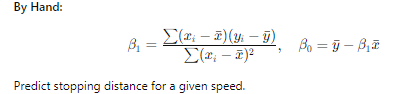

*Figure: Speed on the x-axis and stopping distance on the y-axis. Add a best-fit line to inspect linearity.*

### Excel quick steps
1. Create a scatter plot: Insert → Scatter.  
2. Add trendline: Right-click series → Add Trendline → Display Equation on chart.  
3. Or use the Data Analysis → Regression tool for full output (coefficients, R², ANOVA, residuals).

Useful formulas:
- Intercept: `=INTERCEPT(dist_range, speed_range)`  
- Slope: `=SLOPE(dist_range, speed_range)`

### Interpretation checklist
- Slope: expected change in stopping distance per unit increase in speed.  
- Intercept: predicted stopping distance at speed = 0 (may be non-physical — interpret cautiously).  
- R²: proportion of variance in distance explained by speed.  
- Diagnostics: inspect residual plot for non-linearity and heteroscedasticity; check for influential points.

### Next steps
- Fit the model in Python/R for formal inference (coefficients, p-values, confidence intervals).  
- Plot predicted vs actual and residuals to validate assumptions.

In [2]:
# Python
import pandas as pd
import statsmodels.api as sm

# load the 'cars' dataset from R's datasets via statsmodels
cars = sm.datasets.get_rdataset("cars").data

X = sm.add_constant(cars["speed"])
model = sm.OLS(cars["dist"], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.49e-12
Time:                        21:24:24   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5791      6.758     -2.601      0.0

In [3]:
cars.to_csv("cars.csv", index=False)

Interpret β₀, β₁, p-values, and R².

## Example 2 — Multiple Linear Regression

**Dataset:** `mtcars`

**Task:** Predict miles per gallon (`mpg`) using horsepower (`hp`) and weight (`wt`).

**Python:**

In [4]:
import seaborn as sns
df = sns.load_dataset("mpg").dropna()
import statsmodels.formula.api as smf

model = smf.ols("mpg ~ horsepower + weight", data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          3.06e-104
Time:                        21:38:51   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.0

In [5]:
df.to_csv("mtcars.csv", index=False)

# Excel Workflow and Interpretation Guide

## Data Analysis Steps
1. **Open Data Analysis:** Navigate to Data Analysis → Regression
2. **Select Variables:**
    - Y Range: mpg (dependent variable)  
    - X Range: hp, wt (predictors)

## Interpretation Guidelines

### Coefficient Analysis
- **β₁ (Horsepower):** Impact on MPG when weight is held constant
- **β₂ (Weight):** Impact on MPG when horsepower is held constant 
- **β₀ (Intercept):** Expected MPG when hp=0 and wt=0

### Model Assessment
- Compare relative influence using absolute t-values
- Evaluate overall fit: R² vs adjusted R²
- Check multicollinearity between horsepower and weight

### Key Considerations
- Statistical significance (p-values)
- Direction and magnitude of effects
- Practical significance of relationships

## Example 3: Visualizing Model Fit

c:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


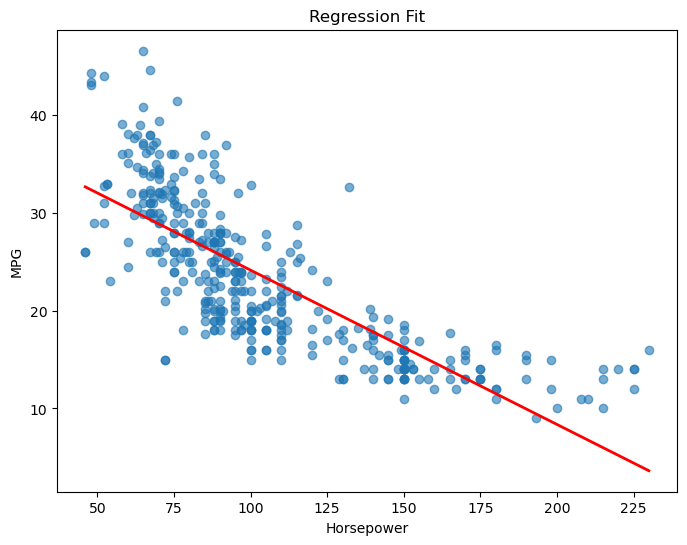

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load data
mtcars = pd.read_csv('mtcars.csv')

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(mtcars['horsepower'], mtcars['mpg'], alpha=0.6)

# Fit linear regression
model = LinearRegression()
X = mtcars[['horsepower']].dropna()
y = mtcars.loc[X.index, 'mpg']
model.fit(X, y)

# Plot regression line
x_line = np.linspace(mtcars['horsepower'].min(), mtcars['horsepower'].max(), 100)
y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red', linewidth=2)

plt.title('Regression Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

Outcome

Learners will be able to:
- Identify dependent and independent variables for regression tasks.
- Fit simple and multiple linear regression models in Excel, R, and Python.
- Interpret model output: coefficients (β), p-values, R² / adjusted R², and confidence intervals.
- Compute and report performance metrics (RMSE, residual standard error) and create diagnostic plots (residuals vs fitted, Q–Q, leverage/influence).
- Check model assumptions (linearity, independence, homoscedasticity, normality of residuals, multicollinearity) and describe corrective actions.
- Export and summarize results (tables and plots) for reproducible reporting across software environments.

Assessment criteria:
- Correct specification of X and Y variables.
- Properly fitted models with interpretable summaries.
- At least one diagnostic plot and one numeric metric (RMSE or R²) reported.
- Clear, concise interpretation of coefficients and model fit.